In [4]:
# Core Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from google.colab import drive

# Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, models  # For building the CNN
from tensorflow.keras.models import load_model # For loading the model

# Data Visualization
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix # For ploting confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # for evaluating all metrix
import seaborn as sns


# OS and Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress unnecessary TensorFlow warnings



CNN ARCHITECTURE

In [16]:

# Define input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Building the Model with More Layers
cnn_model = models.Sequential([
    layers.Input(shape=input_shape),               # Input layer with specified shape
    resize_and_rescale,
    data_augmentation,

    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

     # Convolutional Block 4
    layers.Conv2D(64, (3, 3), activation='relu'),  # Increased filters for deep features
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 5
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 6
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    # Flatten and Fully Connected Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),   # Hidden dense layer
    layers.Dense(n_classes, activation='softmax')  # Output layer
])


# Build the model
cnn_model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


In [17]:

# Model summary
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

Compiling

In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


Training

In [ ]:


history_cnn = cnn_model.fit(train_ds,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    validation_data=val_ds,
                    )


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 495ms/step - accuracy: 0.4294 - loss: 0.9753 - val_accuracy: 0.6146 - val_loss: 0.7909
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.6548 - loss: 0.7912 - val_accuracy: 0.6719 - val_loss: 0.8874
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.7813 - loss: 0.5407 - val_accuracy: 0.7917 - val_loss: 0.4018
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.8393 - loss: 0.3832 - val_accuracy: 0.8490 - val_loss: 0.4565
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - accuracy: 0.8422 - loss: 0.4037 - val_accuracy: 0.9167 - val_loss: 0.2307
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 343ms/step - accuracy: 0.8815 - loss: 0.2727 - val_accuracy: 0.8854 - val_loss: 0.2697
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.8661 - loss: 0.2919 - val_accuracy: 0.9583 - val_loss: 0.1565
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.8984 - loss: 0.2499 - val_accu

Accuarcy and loss plots for CNN Model

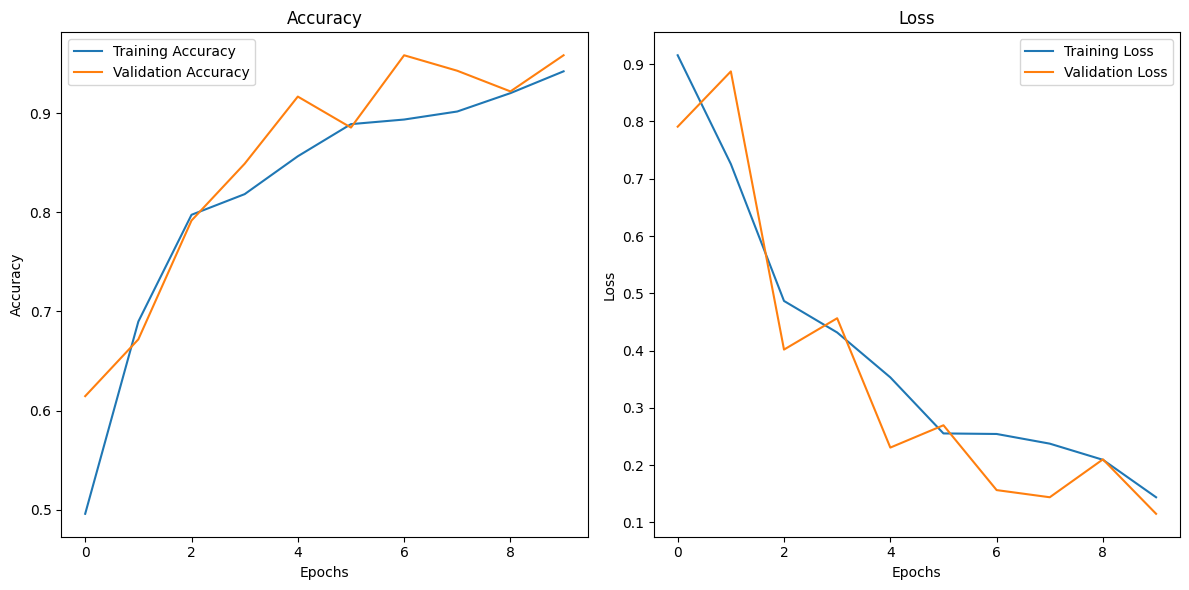

In [ ]:

# Plot accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Predictions

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
predicted label: Potato___Late_blight


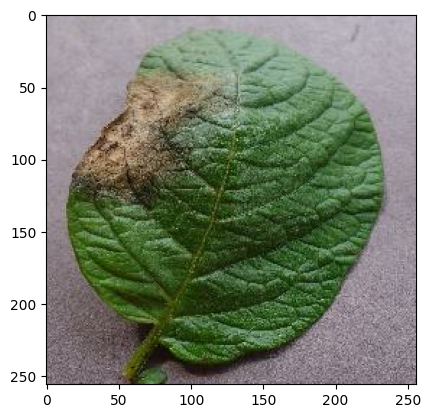

In [ ]:

for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])

  batch_prediction = cnn_model.predict(images_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])

Predicting a batch of images with their confidence values

In [ ]:
def predict(cnn_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = cnn_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


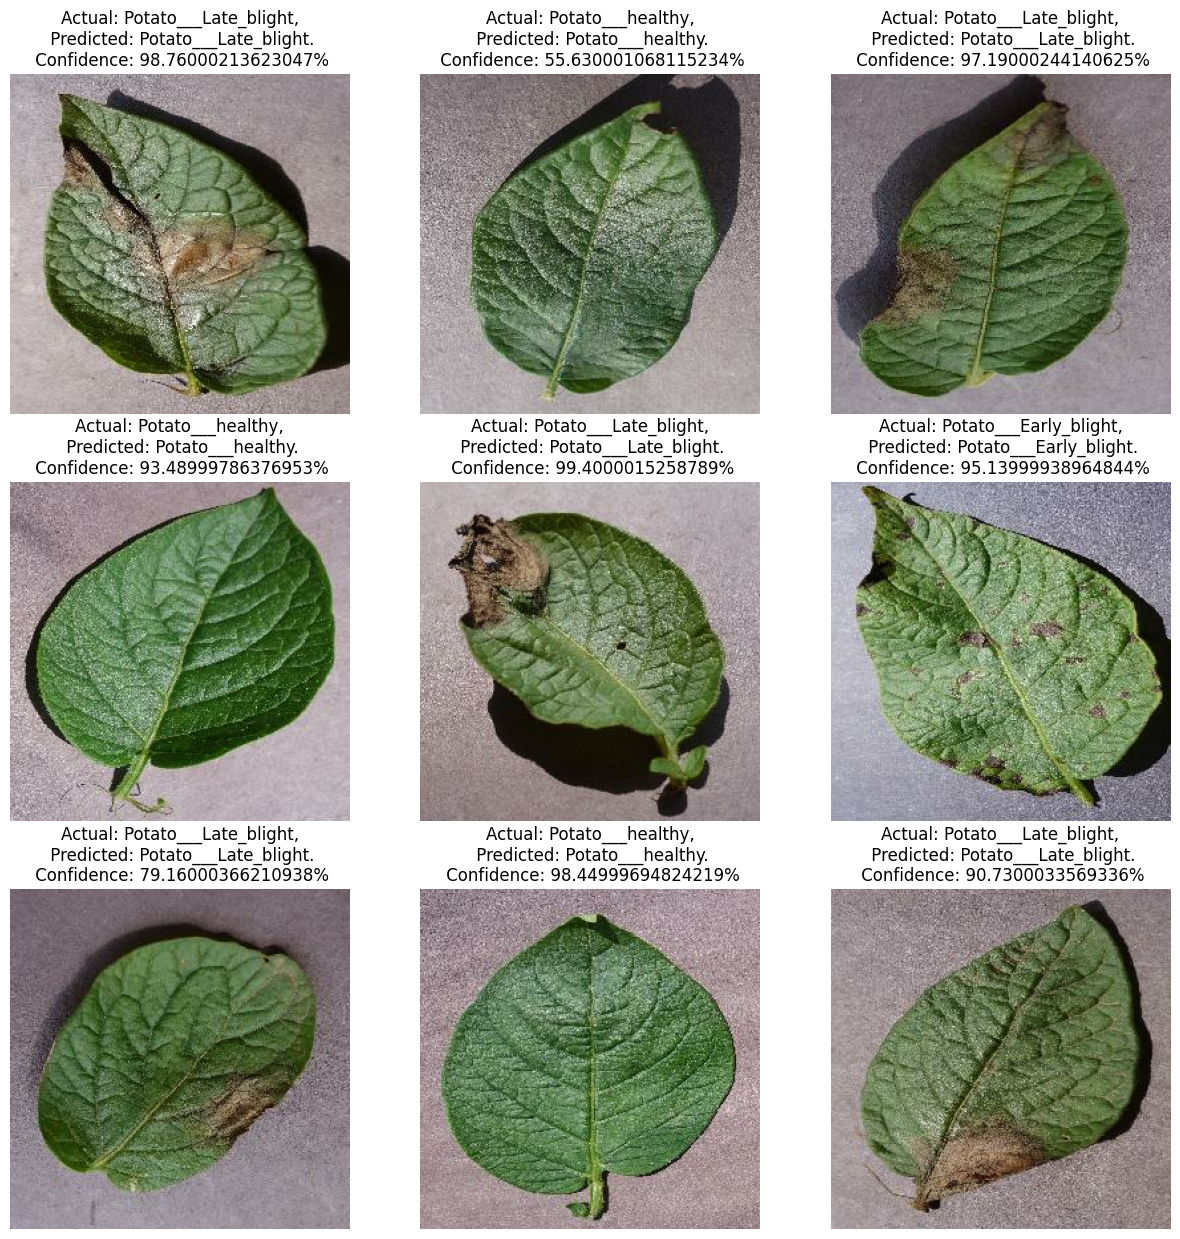

In [ ]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(cnn_model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Saving the model in drive

In [ ]:


# Create a directory in Google Drive to save the model (optional)
cnn_model_save_path = '/content/drive/MyDrive/ds_plantleaves_potato'  # Adjust the path as needed
os.makedirs(cnn_model_save_path, exist_ok=True)

# Save the model
cnn_model_version = 1
cnn_model.save(os.path.join(cnn_model_save_path, f'cnn_model_{cnn_model_version}.keras'))

In [18]:
#from tensorflow.keras.models import load_model

# Load the saved model
saved_model_path = '/content/drive/MyDrive/ds_plantleaves_potato/cnn_model_1.keras'
loaded_model = load_model(saved_model_path)


Confusion Matrix for True labels and predicted labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


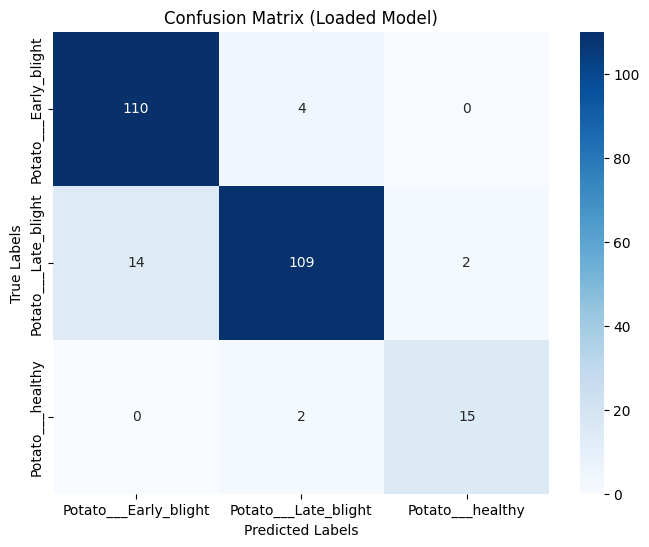

In [19]:

#from sklearn.metrics import confusion_matrix
#import seaborn as sns


# Load the saved model
saved_model_path = '/content/drive/MyDrive/ds_plantleaves_potato/cnn_model_1.keras'
loaded_model = load_model(saved_model_path)

# Initialize lists to store the true labels and predicted labels
y_true1 = []
y_pred1 = []

# Loop through the test dataset and get predictions
for images_batch, labels_batch in test_ds:
    # Predict labels using the loaded model
    batch_predictions = loaded_model.predict(images_batch)
    predicted_labels = np.argmax(batch_predictions, axis=1)  # Get the predicted class labels (indices)

    # Since labels are integer encoded, use them as is
    true_labels = labels_batch.numpy()  # Use as is for integer encoded labels

    # Append the true and predicted labels to the lists
    y_true1.extend(true_labels)
    y_pred1.extend(predicted_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true1, y_pred1)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Loaded Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



Calculating the metrics

In [20]:


# Calculate precision, recall, f1-score, and accuracy
precision = precision_score(y_true1, y_pred1, average='weighted')  # Change 'weighted' to 'micro' or 'macro' if needed
recall = recall_score(y_true1, y_pred1, average='weighted')
f1 = f1_score(y_true1, y_pred1, average='weighted')
accuracy = accuracy_score(y_true1, y_pred1)

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.9164347387798036
Recall: 0.9140625
F1 Score: 0.9137492887780112
Accuracy: 0.9140625
